## Sample of plots using util.ipynb
These are usage examples. The stock data is in `Data` folder and assumes Yahoo Finance EOD is in use. 
The data retrieved uses `Adjusted Close` prices
`SPY` is automatically included but any number of stock symbols can be used.

In [1]:
%run util.ipynb

In [2]:
dates = pd.date_range('2016-01-01','2018-08-31')
df_data = get_data(['TSLA','MSFT'],dates)

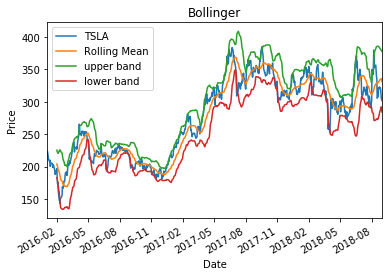

In [3]:
plot_bollinger_bands(df_data,'TSLA')

In [4]:
prices = get_data(['TSLA'],dates)

In [5]:
returns = daily_returns(prices)

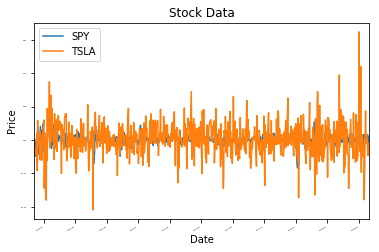

In [6]:
plot_data(returns)

In [7]:
returns['TSLA'].hist(bins=20)
returns['SPY'].hist(bins=20)
plt.legend()

In [8]:
returns.plot(kind='scatter',x='SPY', y='TSLA')

beta and alpha can be calculated with numpy. Y = mx + b where x is the base (SPY) and the Symbol compared (GOOG) is y
 m = beta and b = alpha, therefore AKAM plot = beta * returns of SPY + alpha

In [9]:
beta,alpha = np.polyfit(returns['SPY'],returns['TSLA'],1)
plt.plot(returns['TSLA'], beta*returns['SPY'] + alpha, '-', color='r')

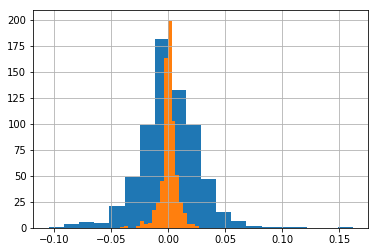

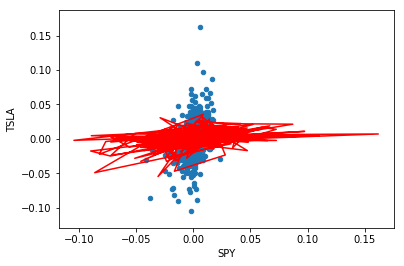

In [10]:
plt.show()

In [11]:
alpha, beta

(-6.5256048716245149e-05, 1.3070078802956038)